In [1]:
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import numpy as np
import os, json, cv2, random
#from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

import face_alignment
from skimage import io

import albumentations as A
from albumentations.pytorch import ToTensorV2

import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as trf
import torchvision.models as models
import torchvision

from PIL import Image
import albumentations as A

from xml.dom import minidom
import random
import copy
import time
from tqdm import tqdm
from tqdm.auto import tqdm as tqdm_

/home/viktor/anaconda3/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [176]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if device.type == "cuda":
    print(torch.cuda.get_device_name())

NVIDIA GeForce GTX 1050 Ti


# Определение Альцгеймера по МРТ

In [3]:
params = {
    "data_path":"/home/viktor/Geek/Datasets/Расширенный набор данных МРТ Альцгеймера V2/data",
    "size":128,
    "lr":0.001,
    "path_model":"pred_model.mdl",
    "batch_size":4,
    "epochs":5,
    "num_workers":4,
}

## Подготовка данных

In [4]:
data = [(x[0].split("/")[-2], x[0].split("/")[-1], [x[0] + "/" + f for f in listdir(x[0]) if isfile(join(x[0], f))]) for x in  os.walk(params["data_path"]) if x[0].split("/")[-2] in ["train", "val"]]

In [5]:
[e[0] for e in data]

['train', 'train', 'train', 'train', 'val', 'val', 'val', 'val']

In [6]:
cls = set()

for d in data:
    cls.add(d[1])

In [7]:
cls_idx = {e:idx for idx,e in enumerate(cls)}

In [8]:
x_train = []
y_train = []
x_val = []
y_val = []

test_tmp = set() 
    
for e in data:
    for f in e[2]:
        print([1.0 if idx == cls_idx[e[1]] else 0.0 for idx in range(len(cls))])
        if e[0] == 'train':
            x_train.append(f)
            y_train.append([1.0 if idx == cls_idx[e[1]] else 0.0 for idx in range(len(cls))])
        else:
            x_val.append(f)
            y_val.append([1.0 if idx == cls_idx[e[1]] else 0.0 for idx in range(len(cls))])

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.

### Пример данных

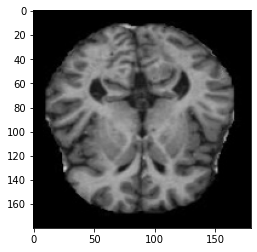

In [100]:
import matplotlib.pyplot as plt
import matplotlib.image as img

testImage = img.imread(x_train[0])

plt.imshow(testImage)

In [9]:
train_torch_transform = trf.Compose([
    trf.ToPILImage(),
    trf.Resize((int(params['size'] * 1.3), int(params['size'] * 1.3))),
    trf.RandomCrop((params['size'], params['size'])),
    trf.RandomRotation(10.0),
    trf.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.05, hue=0.05), 
    trf.ToTensor(),
])

In [10]:
import random

class DlibDataset(Dataset):
    def __init__(self, dir_path, cls, transform=None):
        self.images_paths = dir_path
        self.cls = cls
        self.transform = transform
        self.random()
        
    def random(self):
        cls_tmp = []
        img_paths_tmp = []
        idxs = [e for e in range(len(self.cls))]
        for _ in range(len(self.cls)):
            idx = random.choice(idxs)
            img_paths_tmp.append(self.images_paths[idx])
            cls_tmp.append(self.cls[idx])
        self.images_paths = img_paths_tmp
        self.cls = cls_tmp
        
    def __len__(self):
        return len(self.cls) #len(self.data)
    
    def __getitem__(self, idx):
        label = self.cls[idx]
        image = cv2.imread(self.images_paths[idx])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        if self.transform is not None:
            if type(self.transform) is A.Compose:
                image = self.transform(image = image)["image"]
            else:
                image = self.transform(image)
        
        #print(label)
        #print("-----")
        return image, torch.tensor(label)

In [11]:
ds_train = DlibDataset(x_train, y_train, train_torch_transform)
ds_val = DlibDataset(x_val, y_val, train_torch_transform)

In [19]:
train_loader = DataLoader(
    ds_train, batch_size=params["batch_size"], shuffle=True, num_workers=params["num_workers"], pin_memory=False,
)
test_loader = DataLoader(
    ds_val, batch_size=1, shuffle=False, num_workers=1, pin_memory=False,
)

## Подготовка нейронной сети

In [12]:
class SeparableConv2d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, bias=False, strides=1, padding=0, activation='relu'):
        super(SeparableConv2d, self).__init__()
        self.depthwise = nn.Conv2d(in_channels, in_channels, kernel_size=kernel_size,
                                   groups=in_channels, bias=bias, padding=padding, stride=strides)
        self.pointwise = nn.Conv2d(in_channels, out_channels,
                                   kernel_size=1, bias=bias, stride=strides)
        self.activation = activation
    def forward(self, x):
        if self.activation == 'relu':
            out = torch.relu(self.depthwise(x))
            out = torch.relu(self.pointwise(out))
        elif self.activation == 'sigmoid':
            out = torch.sigmoid(self.depthwise(x))
            out = torch.sigmoid(self.pointwise(out))
        else:
            out = self.depthwise(x)
            out = self.pointwise(out)
    
        return out

In [13]:
class CNN(nn.Module):
    def __init__(self, **kwargs):
        super(CNN, self).__init__()
        self.convlayer0_1 = nn.Sequential(
            nn.Conv2d(in_channels=kwargs["input_shape"], out_channels=16, kernel_size=(4, 4), padding=2),
            nn.Conv2d(in_channels=16, out_channels=24, kernel_size=(4, 4),padding=2),
            nn.MaxPool2d(2, stride=2),
        )
        
        self.convlayer0_2 = nn.Sequential(
            nn.Conv2d(in_channels=24, out_channels=32, kernel_size=(5, 5),padding=2),
            nn.Conv2d(in_channels=32, out_channels=48, kernel_size=(5, 5),padding=2),
            nn.MaxPool2d(2, stride=2),
        )
        
        self.convlayer0_3 = nn.Sequential(
            nn.Conv2d(in_channels=48, out_channels=64, kernel_size=(5, 5),padding=1),
            nn.Conv2d(in_channels=64, out_channels=92, kernel_size=(5, 5),padding=1),
            nn.MaxPool2d(2, stride=2),
        )
        
        self.convlayer1 = nn.Sequential(
            SeparableConv2d(in_channels=92, out_channels=128, kernel_size=(5, 5), strides=1,padding=1),
            nn.BatchNorm2d(128), #nn.ReLU(),
            SeparableConv2d(in_channels=128, out_channels=128, kernel_size=(5, 5), strides=1,padding=1),
            nn.BatchNorm2d(128), #nn.ReLU(),
        )
        self.convlayer2 = nn.Sequential(
            SeparableConv2d(in_channels=128, out_channels=128, kernel_size=(5, 5), strides=1,padding=1), #nn.ReLU(),
            SeparableConv2d(in_channels=128, out_channels=128, kernel_size=(5, 5), strides=1,padding=1), #nn.ReLU(),
        )
        self.convlayer3 = nn.Sequential(
            SeparableConv2d(in_channels=128, out_channels=128, kernel_size=(5, 5), strides=1,padding=1),
            nn.BatchNorm2d(128), #nn.ReLU(),
            SeparableConv2d(in_channels=128, out_channels=128, kernel_size=(5, 5), strides=1,padding=1),
            nn.BatchNorm2d(128), #nn.ReLU(),
        )
        
        self.flatten = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=512, out_features=4, bias=True),
        )
        
    def forward(self, x):
        x = nn.functional.relu(self.convlayer0_1(x))
        x = nn.functional.relu(self.convlayer0_2(x))
        x = nn.functional.relu(self.convlayer0_3(x))
        x = nn.functional.relu(self.convlayer1(x))
        x = nn.functional.relu(self.convlayer2(x))
        x = nn.functional.relu(self.convlayer3(x))
        x = nn.functional.log_softmax(self.flatten(x), -1)
        
        return x

In [32]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = CNN(input_shape=3).to(device)
criterion = nn.MSELoss()

In [33]:
optimizer = optim.Adam(model.parameters(), lr=params['lr'])#1e-3)

In [34]:
def calculate_accuracy_(output, target):
    n = np.shape(target)
    arr = abs(output - target) / target
    arr = arr.detach().numpy()
    max_ = np.max(arr)
    if max_ > 1:
        arr /= max_
    return 1 - (np.sum(arr)/ (n[0] + n[1]))
    #print(l)
    #return np.sum(np.sum(np.where(target == 0, -1, 1) == (np.multiply(output >= 0.5, 1)).numpy())) / (np.sum(target.numpy()))

In [35]:
def calculate_accuracy_ (target, output):
    return float(torch.sum(torch.eq(torch.argmax(target, dim=1),torch.argmax(output, dim=1))).numpy())/ len(target)    

## Обучение

In [27]:
try:
    print(model.load_state_dict(params['path_model']))
except:
    print("Модель не загрузилась")

In [51]:
for epoch in tqdm_(range(params['epochs']), total=params['epochs']):
    loss = 0
    len_ = 0
    running_corrects = 0.0
    n_batches = len(train_loader)
    for batch_features, labels in tqdm_(train_loader, total=n_batches):
        # load it to the active device
        #try:
            labels = torch.tensor([e.numpy() for e in labels]).float()
            device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
            labels = labels.to(device)
            # reset the gradients back to zero
            # PyTorch accumulates gradients on subsequent backward passes
            optimizer.zero_grad()
            outputs = model(batch_features.to(device))

            # compute training reconstruction loss
            train_loss = criterion(outputs, torch.tensor([e.numpy() for e in labels.cpu()]).float().to(device))

            # compute accumulated gradients
            train_loss.backward()
            # perform parameter update based on current gradients
            optimizer.step()

            # add the mini-batch training loss to epoch loss
            loss += train_loss.item()
            running_corrects += calculate_accuracy_(outputs.cpu(), labels.cpu())
            len_ += len(outputs)
        #except:
            #print('Error')
    
    epoch_acc = running_corrects / (len_/ params["batch_size"])
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.6f} Acc: {:.4f}".format(epoch + 1, params['epochs'], loss, epoch_acc))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 1/1, loss = 2.858581 Acc: 0.4127


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 2/1, loss = 2.845856 Acc: 0.5593


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 3/1, loss = 2.840672 Acc: 0.6025


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 4/1, loss = 2.836471 Acc: 0.6497


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 5/1, loss = 2.832944 Acc: 0.6904


In [53]:
params['epochs'] = 10

In [54]:
for epoch in tqdm_(range(params['epochs']), total=params['epochs']):
    loss = 0
    len_ = 0
    running_corrects = 0.0
    n_batches = len(train_loader)
    for batch_features, labels in tqdm_(train_loader, total=n_batches):
        # load it to the active device
        #try:
            labels = torch.tensor([e.numpy() for e in labels]).float()
            device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
            labels = labels.to(device)
            # reset the gradients back to zero
            # PyTorch accumulates gradients on subsequent backward passes
            optimizer.zero_grad()
            outputs = model(batch_features.to(device))

            # compute training reconstruction loss
            train_loss = criterion(outputs, torch.tensor([e.numpy() for e in labels.cpu()]).float().to(device))

            # compute accumulated gradients
            train_loss.backward()
            # perform parameter update based on current gradients
            optimizer.step()

            # add the mini-batch training loss to epoch loss
            loss += train_loss.item()
            running_corrects += calculate_accuracy_(outputs.cpu(), labels.cpu())
            len_ += len(outputs)
        #except:
            #print('Error')
    
    epoch_acc = running_corrects / (len_/ params["batch_size"])
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.6f} Acc: {:.4f}".format(epoch + 1, params['epochs'], loss, epoch_acc))

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 1/10, loss = 2.829701 Acc: 0.7242


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 2/10, loss = 2.826739 Acc: 0.7522


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 3/10, loss = 2.823639 Acc: 0.7850


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 4/10, loss = 2.821106 Acc: 0.8084


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 5/10, loss = 2.818995 Acc: 0.8270


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 6/10, loss = 2.816581 Acc: 0.8470


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 7/10, loss = 2.814569 Acc: 0.8651


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 8/10, loss = 2.812995 Acc: 0.8770


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 9/10, loss = 2.811619 Acc: 0.8874


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 10/10, loss = 2.810642 Acc: 0.8939


In [82]:
params['epochs'] = 3

In [83]:
for epoch in tqdm_(range(params['epochs']), total=params['epochs']):
    loss = 0
    len_ = 0
    running_corrects = 0.0
    n_batches = len(train_loader)
    for batch_features, labels in tqdm_(train_loader, total=n_batches):
        # load it to the active device
        #try:
            labels = torch.tensor([e.numpy() for e in labels]).float()
            device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
            labels = labels.to(device)
            # reset the gradients back to zero
            # PyTorch accumulates gradients on subsequent backward passes
            optimizer.zero_grad()
            outputs = model(batch_features.to(device))

            # compute training reconstruction loss
            train_loss = criterion(outputs, torch.tensor([e.numpy() for e in labels.cpu()]).float().to(device))

            # compute accumulated gradients
            train_loss.backward()
            # perform parameter update based on current gradients
            optimizer.step()

            # add the mini-batch training loss to epoch loss
            loss += train_loss.item()
            running_corrects += calculate_accuracy_(outputs.cpu(), labels.cpu())
            len_ += len(outputs)
        #except:
            #print('Error')
    
    epoch_acc = running_corrects / (len_/ params["batch_size"])
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.6f} Acc: {:.4f}".format(epoch + 1, params['epochs'], loss, epoch_acc))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 1/3, loss = 2.809506 Acc: 0.9043


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 2/3, loss = 2.808552 Acc: 0.9120


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 3/3, loss = 2.807946 Acc: 0.9166


In [99]:
for epoch in tqdm_(range(params['epochs']), total=params['epochs']):
    loss = 0
    len_ = 0
    running_corrects = 0.0
    n_batches = len(train_loader)
    for batch_features, labels in tqdm_(train_loader, total=n_batches):
        # load it to the active device
        #try:
            labels = torch.tensor([e.numpy() for e in labels]).float()
            device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
            labels = labels.to(device)
            # reset the gradients back to zero
            # PyTorch accumulates gradients on subsequent backward passes
            optimizer.zero_grad()
            outputs = model(batch_features.to(device))

            # compute training reconstruction loss
            train_loss = criterion(outputs, torch.tensor([e.numpy() for e in labels.cpu()]).float().to(device))

            # compute accumulated gradients
            train_loss.backward()
            # perform parameter update based on current gradients
            optimizer.step()

            # add the mini-batch training loss to epoch loss
            loss += train_loss.item()
            running_corrects += calculate_accuracy_(outputs.cpu(), labels.cpu())
            len_ += len(outputs)
        #except:
            #print('Error')
    
    epoch_acc = running_corrects / (len_/ params["batch_size"])
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.6f} Acc: {:.4f}".format(epoch + 1, params['epochs'], loss, epoch_acc))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 1/3, loss = 2.807151 Acc: 0.9233


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 2/3, loss = 2.806058 Acc: 0.9305


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 3/3, loss = 2.805749 Acc: 0.9329


In [111]:
for epoch in tqdm_(range(params['epochs']), total=params['epochs']):
    loss = 0
    len_ = 0
    running_corrects = 0.0
    n_batches = len(train_loader)
    for batch_features, labels in tqdm_(train_loader, total=n_batches):
        # load it to the active device
        #try:
            labels = torch.tensor([e.numpy() for e in labels]).float()
            device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
            labels = labels.to(device)
            # reset the gradients back to zero
            # PyTorch accumulates gradients on subsequent backward passes
            optimizer.zero_grad()
            outputs = model(batch_features.to(device))

            # compute training reconstruction loss
            train_loss = criterion(outputs, torch.tensor([e.numpy() for e in labels.cpu()]).float().to(device))

            # compute accumulated gradients
            train_loss.backward()
            # perform parameter update based on current gradients
            optimizer.step()

            # add the mini-batch training loss to epoch loss
            loss += train_loss.item()
            running_corrects += calculate_accuracy_(outputs.cpu(), labels.cpu())
            len_ += len(outputs)
        #except:
            #print('Error')
    
    epoch_acc = running_corrects / (len_/ params["batch_size"])
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.6f} Acc: {:.4f}".format(epoch + 1, params['epochs'], loss, epoch_acc))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 1/3, loss = 2.805170 Acc: 0.9383


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 2/3, loss = 2.805178 Acc: 0.9370


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 3/3, loss = 2.804479 Acc: 0.9430


In [124]:
for epoch in tqdm_(range(params['epochs']), total=params['epochs']):
    loss = 0
    len_ = 0
    running_corrects = 0.0
    n_batches = len(train_loader)
    for batch_features, labels in tqdm_(train_loader, total=n_batches):
        # load it to the active device
        #try:
            labels = torch.tensor([e.numpy() for e in labels]).float()
            device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
            labels = labels.to(device)
            # reset the gradients back to zero
            # PyTorch accumulates gradients on subsequent backward passes
            optimizer.zero_grad()
            outputs = model(batch_features.to(device))

            # compute training reconstruction loss
            train_loss = criterion(outputs, torch.tensor([e.numpy() for e in labels.cpu()]).float().to(device))

            # compute accumulated gradients
            train_loss.backward()
            # perform parameter update based on current gradients
            optimizer.step()

            # add the mini-batch training loss to epoch loss
            loss += train_loss.item()
            running_corrects += calculate_accuracy_(outputs.cpu(), labels.cpu())
            len_ += len(outputs)
        #except:
            #print('Error')
    
    epoch_acc = running_corrects / (len_/ params["batch_size"])
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.6f} Acc: {:.4f}".format(epoch + 1, params['epochs'], loss, epoch_acc))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 1/3, loss = 2.804006 Acc: 0.9457


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 2/3, loss = 2.803590 Acc: 0.9489


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 3/3, loss = 2.803293 Acc: 0.9523


In [133]:
for epoch in tqdm_(range(params['epochs']), total=params['epochs']):
    loss = 0
    len_ = 0
    running_corrects = 0.0
    n_batches = len(train_loader)
    for batch_features, labels in tqdm_(train_loader, total=n_batches):
        # load it to the active device
        #try:
            labels = torch.tensor([e.numpy() for e in labels]).float()
            device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
            labels = labels.to(device)
            # reset the gradients back to zero
            # PyTorch accumulates gradients on subsequent backward passes
            optimizer.zero_grad()
            outputs = model(batch_features.to(device))

            # compute training reconstruction loss
            train_loss = criterion(outputs, torch.tensor([e.numpy() for e in labels.cpu()]).float().to(device))

            # compute accumulated gradients
            train_loss.backward()
            # perform parameter update based on current gradients
            optimizer.step()

            # add the mini-batch training loss to epoch loss
            loss += train_loss.item()
            running_corrects += calculate_accuracy_(outputs.cpu(), labels.cpu())
            len_ += len(outputs)
        #except:
            #print('Error')
    
    epoch_acc = running_corrects / (len_/ params["batch_size"])
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.6f} Acc: {:.4f}".format(epoch + 1, params['epochs'], loss, epoch_acc))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 1/3, loss = 2.803202 Acc: 0.9518


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 2/3, loss = 2.802620 Acc: 0.9572


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 3/3, loss = 2.802434 Acc: 0.9577


In [141]:
for epoch in tqdm_(range(params['epochs']), total=params['epochs']):
    loss = 0
    len_ = 0
    running_corrects = 0.0
    n_batches = len(train_loader)
    for batch_features, labels in tqdm_(train_loader, total=n_batches):
        # load it to the active device
        #try:
            labels = torch.tensor([e.numpy() for e in labels]).float()
            device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
            labels = labels.to(device)
            # reset the gradients back to zero
            # PyTorch accumulates gradients on subsequent backward passes
            optimizer.zero_grad()
            outputs = model(batch_features.to(device))

            # compute training reconstruction loss
            train_loss = criterion(outputs, torch.tensor([e.numpy() for e in labels.cpu()]).float().to(device))

            # compute accumulated gradients
            train_loss.backward()
            # perform parameter update based on current gradients
            optimizer.step()

            # add the mini-batch training loss to epoch loss
            loss += train_loss.item()
            running_corrects += calculate_accuracy_(outputs.cpu(), labels.cpu())
            len_ += len(outputs)
        #except:
            #print('Error')
    
    epoch_acc = running_corrects / (len_/ params["batch_size"])
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.6f} Acc: {:.4f}".format(epoch + 1, params['epochs'], loss, epoch_acc))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 1/3, loss = 2.802126 Acc: 0.9603


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 2/3, loss = 2.801979 Acc: 0.9604


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 3/3, loss = 2.801980 Acc: 0.9618


In [150]:
for epoch in tqdm_(range(params['epochs']), total=params['epochs']):
    loss = 0
    len_ = 0
    running_corrects = 0.0
    n_batches = len(train_loader)
    for batch_features, labels in tqdm_(train_loader, total=n_batches):
        # load it to the active device
        #try:
            labels = torch.tensor([e.numpy() for e in labels]).float()
            device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
            labels = labels.to(device)
            # reset the gradients back to zero
            # PyTorch accumulates gradients on subsequent backward passes
            optimizer.zero_grad()
            outputs = model(batch_features.to(device))

            # compute training reconstruction loss
            train_loss = criterion(outputs, torch.tensor([e.numpy() for e in labels.cpu()]).float().to(device))

            # compute accumulated gradients
            train_loss.backward()
            # perform parameter update based on current gradients
            optimizer.step()

            # add the mini-batch training loss to epoch loss
            loss += train_loss.item()
            running_corrects += calculate_accuracy_(outputs.cpu(), labels.cpu())
            len_ += len(outputs)
        #except:
            #print('Error')
    
    epoch_acc = running_corrects / (len_/ params["batch_size"])
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.6f} Acc: {:.4f}".format(epoch + 1, params['epochs'], loss, epoch_acc))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 1/3, loss = 2.801640 Acc: 0.9638


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 2/3, loss = 2.801277 Acc: 0.9653


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 3/3, loss = 2.801268 Acc: 0.9664


In [166]:
for epoch in tqdm_(range(params['epochs']), total=params['epochs']):
    loss = 0
    len_ = 0
    running_corrects = 0.0
    n_batches = len(train_loader)
    for batch_features, labels in tqdm_(train_loader, total=n_batches):
        # load it to the active device
        #try:
            labels = torch.tensor([e.numpy() for e in labels]).float()
            device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
            labels = labels.to(device)
            # reset the gradients back to zero
            # PyTorch accumulates gradients on subsequent backward passes
            optimizer.zero_grad()
            outputs = model(batch_features.to(device))

            # compute training reconstruction loss
            train_loss = criterion(outputs, torch.tensor([e.numpy() for e in labels.cpu()]).float().to(device))

            # compute accumulated gradients
            train_loss.backward()
            # perform parameter update based on current gradients
            optimizer.step()

            # add the mini-batch training loss to epoch loss
            loss += train_loss.item()
            running_corrects += calculate_accuracy_(outputs.cpu(), labels.cpu())
            len_ += len(outputs)
        #except:
            #print('Error')
    
    epoch_acc = running_corrects / (len_/ params["batch_size"])
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.6f} Acc: {:.4f}".format(epoch + 1, params['epochs'], loss, epoch_acc))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 1/3, loss = 2.800859 Acc: 0.9701


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 2/3, loss = 2.800535 Acc: 0.9714


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 3/3, loss = 2.800603 Acc: 0.9711


In [ ]:
for epoch in tqdm_(range(params['epochs']), total=params['epochs']):
    loss = 0
    len_ = 0
    running_corrects = 0.0
    n_batches = len(train_loader)
    for batch_features, labels in tqdm_(train_loader, total=n_batches):
        # load it to the active device
        #try:
            labels = torch.tensor([e.numpy() for e in labels]).float()
            device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
            labels = labels.to(device)
            # reset the gradients back to zero
            # PyTorch accumulates gradients on subsequent backward passes
            optimizer.zero_grad()
            outputs = model(batch_features.to(device))

            # compute training reconstruction loss
            train_loss = criterion(outputs, torch.tensor([e.numpy() for e in labels.cpu()]).float().to(device))

            # compute accumulated gradients
            train_loss.backward()
            # perform parameter update based on current gradients
            optimizer.step()

            # add the mini-batch training loss to epoch loss
            loss += train_loss.item()
            running_corrects += calculate_accuracy_(outputs.cpu(), labels.cpu())
            len_ += len(outputs)
        #except:
            #print('Error')
    
    epoch_acc = running_corrects / (len_/ params["batch_size"])
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.6f} Acc: {:.4f}".format(epoch + 1, params['epochs'], loss, epoch_acc))

In [ ]:
for epoch in tqdm_(range(params['epochs']), total=params['epochs']):
    loss = 0
    len_ = 0
    running_corrects = 0.0
    n_batches = len(train_loader)
    for batch_features, labels in tqdm_(train_loader, total=n_batches):
        # load it to the active device
        #try:
            labels = torch.tensor([e.numpy() for e in labels]).float()
            device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
            labels = labels.to(device)
            # reset the gradients back to zero
            # PyTorch accumulates gradients on subsequent backward passes
            optimizer.zero_grad()
            outputs = model(batch_features.to(device))

            # compute training reconstruction loss
            train_loss = criterion(outputs, torch.tensor([e.numpy() for e in labels.cpu()]).float().to(device))

            # compute accumulated gradients
            train_loss.backward()
            # perform parameter update based on current gradients
            optimizer.step()

            # add the mini-batch training loss to epoch loss
            loss += train_loss.item()
            running_corrects += calculate_accuracy_(outputs.cpu(), labels.cpu())
            len_ += len(outputs)
        #except:
            #print('Error')
    
    epoch_acc = running_corrects / (len_/ params["batch_size"])
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.6f} Acc: {:.4f}".format(epoch + 1, params['epochs'], loss, epoch_acc))

In [203]:
for epoch in tqdm_(range(params['epochs']), total=params['epochs']):
    loss = 0
    len_ = 0
    running_corrects = 0.0
    n_batches = len(train_loader)
    for batch_features, labels in tqdm_(train_loader, total=n_batches):
        # load it to the active device
        #try:
            labels = torch.tensor([e.numpy() for e in labels]).float()
            device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
            labels = labels.to(device)
            # reset the gradients back to zero
            # PyTorch accumulates gradients on subsequent backward passes
            optimizer.zero_grad()
            outputs = model(batch_features.to(device))

            # compute training reconstruction loss
            train_loss = criterion(outputs, torch.tensor([e.numpy() for e in labels.cpu()]).float().to(device))

            # compute accumulated gradients
            train_loss.backward()
            # perform parameter update based on current gradients
            optimizer.step()

            # add the mini-batch training loss to epoch loss
            loss += train_loss.item()
            running_corrects += calculate_accuracy_(outputs.cpu(), labels.cpu())
            len_ += len(outputs)
        #except:
            #print('Error')
    
    epoch_acc = running_corrects / (len_/ params["batch_size"])
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.6f} Acc: {:.4f}".format(epoch + 1, params['epochs'], loss, epoch_acc))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 1/3, loss = 2.799376 Acc: 0.9798


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 2/3, loss = 2.799668 Acc: 0.9780


  0%|          | 0/8496 [00:00<?, ?it/s]

epoch : 3/3, loss = 2.799488 Acc: 0.9789


In [178]:
torch.save(model.state_dict(), params['path_model'])

## Проверка результата на тестовой выборке

In [204]:
y_acc = []
y_true = []
y_pred = []

n_batches = len(test_loader)
for batch_features, labels in tqdm_(test_loader, total=n_batches):
    labels = torch.tensor([e.numpy() for e in labels]).float()
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    labels = labels.to(device)
    outputs = model(batch_features.to(device))
    label = torch.argmax(labels.cpu(), dim=1)
    pred = torch.argmax(outputs.cpu(), dim=1)
    y_true.append(label.numpy())
    y_pred.append(pred.numpy())
    y_acc.append(torch.eq(label,pred).numpy())

  0%|          | 0/6400 [00:00<?, ?it/s]

In [205]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix([list(cls)[int(np.round(e))] for e in y_true], [list(cls)[int(np.round(e))] for e in y_pred])
conf_matrix

array([[ 878,    0,    6,    1],
       [   0,   60,    0,    0],
       [   3,    0, 3210,   11],
       [  14,    0,  292, 1925]])

In [206]:
cls_idx

{'NonDemented': 0,
 'ModerateDemented': 1,
 'VeryMildDemented': 2,
 'MildDemented': 3}

In [207]:
cls_name = ["Здоров", "Умеренный слабоумный", "Очень Слабоумный", "Слабоумный"]

In [208]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Матрица неточностей

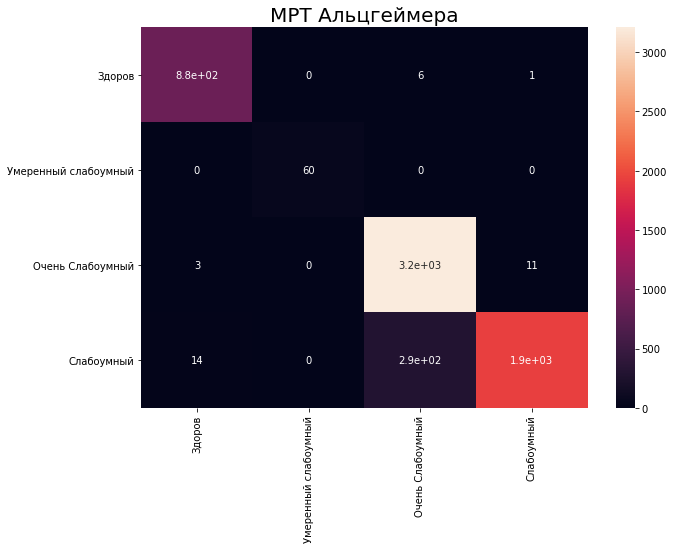

In [209]:
plt.figure(figsize = (10,7))
ax = sns.heatmap(pd.DataFrame(conf_matrix, cls_name, cls_name), annot=True)
plt.title('МРТ Альцгеймера', fontsize = 20) # title with fontsize 20

plt.show()

In [202]:
f"Точность на тестовой выборки составляет {(np.sum(y_acc)/(len(test_loader)))*100}%"

'Точность на тестовой выборки составляет 97.265625%'